In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/flipkart_data.csv')

In [ ]:
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


In [ ]:
df.shape

(9976, 2)

In [ ]:
df['rating'].value_counts()

5    5726
4    2365
3     884
1     691
2     310
Name: rating, dtype: int64

In [ ]:
df.describe()

,rating
count,9976.000000
mean,4.215417
std,1.167911
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df['review'].nunique()

7694

In [ ]:
df.dtypes

review    object
rating     int64
dtype: object

In [ ]:
df.isnull().sum()

review    0
rating    0
dtype: int64

In [ ]:
df.duplicated().sum()

2108

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
#let us check the first 5 data of the columnn 'text'
print(df['review'].iloc[0],"\n")
print(df['review'].iloc[1],"\n")
print(df['review'].iloc[2],"\n")
print(df['review'].iloc[3],"\n")
print(df['review'].iloc[4],"\n")

It was nice produt. I like it's design a lot.  It's easy to carry. And.   Looked stylish.READ MORE 

awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE 

awesome sound quality. pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output. Bass and treble are really very clear without equaliser. With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention. Really expecting other leading brands to implement this.ConsVery tight in ears. adjusters are ok .. this ll be very tight...READ MORE 

I think it is such a good product not only as per the quality but also the design is quite good . I m using this product from January ... In this pandamic situation it has became the most useful and helpful . Overall the bass and the sound quality is pretty go

In [ ]:
print(df['review'].unique())

["It was nice produt. I like it's design a lot.  It's easy to carry. And.   Looked stylish.READ MORE"
 'awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE'
 'awesome sound quality. pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output. Bass and treble are really very clear without equaliser. With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention. Really expecting other leading brands to implement this.ConsVery tight in ears. adjusters are ok .. this ll be very tight...READ MORE'
 ... "It's tight and not more comfortableREAD MORE"
 'Everything is amazimg but the built is very light..READ MORE'
 'Best headphone i have ever used....READ MORE']


In [ ]:
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###Converting to Lower case

In [ ]:
# Converting to Lower case

df['review']=df['review'].str.lower()
df['review'].head()

0    it was nice produt. i like it's design a lot. ...
1    awesome sound....very pretty to see this nd th...
2    awesome sound quality. pros 7-8 hrs of battery...
3    i think it is such a good product not only as ...
4    awesome bass sound quality very good bettary l...
Name: review, dtype: object

###Removing Punctuations and special characters

In [ ]:
#Removig punctuations,special characters, numbers
df['review'] = df['review'].str.replace("[^a-zA-Z#]", " ")
df['review'].head()

0    It was nice produt  I like it s design a lot  ...
1    awesome sound    very pretty to see this nd th...
2    awesome sound quality  pros     hrs of battery...
3    I think it is such a good product not only as ...
4    awesome bass sound quality very good bettary l...
Name: review, dtype: object

###Removing whitespaces

In [ ]:
df['review'] = df['review'].str.replace(r'\s+', ' ', regex=True)
df.head()

,review,rating
0,It was nice produt I like it s design a lot It...,5
1,awesome sound very pretty to see this nd the s...,5
2,awesome sound quality pros hrs of battery life...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


###Remove shortwords

In [ ]:
df['review'] = df['review'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,review,rating
0,nice produt like design easy carry Looked styl...,5
1,awesome sound very pretty this sound quality g...,5
2,awesome sound quality pros battery life includ...,4
3,think such good product only quality also desi...,5
4,awesome bass sound quality very good bettary l...,5


###Remove Stopwords

In [ ]:
stop=stopwords.words('english')
df['review']=df['review'].apply(lambda x:" ".join([word for word in x.split() if word not in stop]))
df.review.head()

0    nice produt like design easy carry Looked styl...
1    awesome sound pretty sound quality good wish t...
2    awesome sound quality pros battery life includ...
3    think good product quality also design quite g...
4    awesome bass sound quality good bettary long l...
Name: review, dtype: object

##Polarity and Subjectivity
Polarity means how positive or negative the text is the value of polarity lies between -1 to 1
negative value indicates that the sentiment is not good
positive value indicates that the sentiment is good

Subjectivity means statement or opinion or piece of text influenced by personal feelings
The value of subjectivity relates to whether it is a public opinion or its factual information
the value of subjectivity lies between 0 to 1.


In [ ]:
from textblob import TextBlob
from textblob import Word

In [99]:
import pandas as pd
#from textblob import TextBlob

# Assuming you have a DataFrame 'df' with columns 'review' and 'rating'
# df = ... # Your DataFrame with columns 'review' and 'rating'

df['review'] = df['review'].astype(str)

# Create empty lists to store polarity scores and sentiments
polarity_scores = []
sentiments = []

# Function to get sentiment based on rating
def get_sentiment_from_rating(rating):
    if rating == 1:
        return 'Negative'
    elif rating == 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    elif rating == 4:
        return 'Positive'
    else:  # rating == 5
        return 'Positive'

# Calculate polarity scores and sentiments
for i in range(0, df.shape[0]):
    # Calculate polarity score
    score = TextBlob(df.iloc[i]['review']).sentiment.polarity
    polarity_scores.append(score)

    # Get sentiment based on rating
    rating = df.iloc[i]['rating']
    sentiment = get_sentiment_from_rating(rating)
    sentiments.append(sentiment)

# Add polarity scores and sentiments to DataFrame
df['polarity_score'] = polarity_scores
df['sentiment'] = sentiments


In [101]:
# Display the DataFrame with added polarity scores and sentiments
df.head()

,review,rating,polarity_score,sentiment
0,nice produt like design easy carry Looked styl...,5,0.508333,Positive
1,awesome sound pretty sound quality good wish t...,5,0.564286,Positive
2,awesome sound quality pros battery life includ...,4,0.324554,Positive
3,think good product quality also design quite g...,5,0.377778,Positive
4,awesome bass sound quality good bettary long l...,5,0.371429,Positive


###Exploratory Data Analysis

<Axes: xlabel='rating', ylabel='count'>

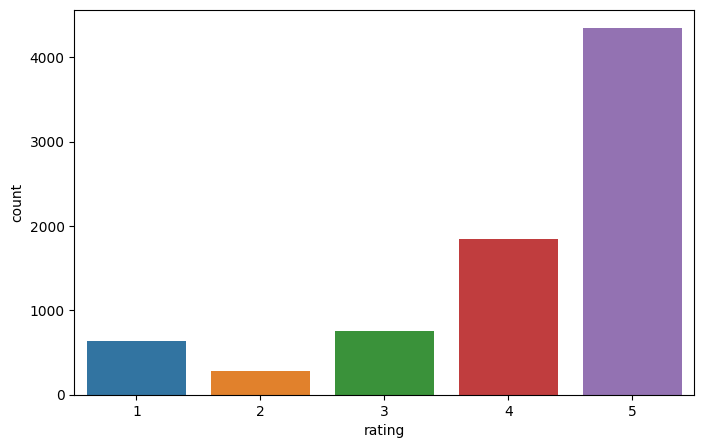

In [106]:
fig = plt.figure(figsize=(8,5))
sns.countplot(x='rating',data=df)

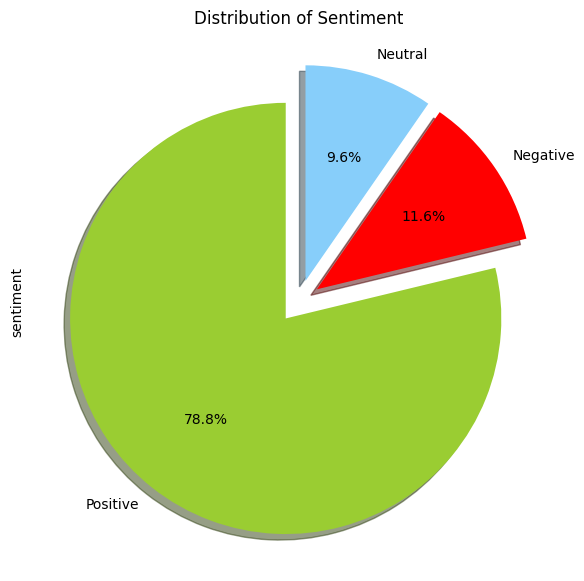

In [109]:
import matplotlib.pyplot as plt

# Assuming 'df' contains the DataFrame with the provided columns

# Count the occurrences of each sentiment
tags = df['sentiment'].value_counts()

# Colors for pie chart
colors = ("yellowgreen", "red", "lightskyblue")

# Explode values based on the number of categories present
explode = [0.1] * len(tags)  # Equal explode values for all categories

# Plotting the pie chart
fig = plt.figure(figsize=(7, 7))
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
          startangle=90, explode=explode, labels=tags.index)
plt.title("Distribution of Sentiment")
plt.show()


In [114]:
positive_tweet = df[df['sentiment'] == 'Positive']
positive_tweet = positive_tweet.sort_values(['polarity_score'],ascending=False)
positive_tweet.head()

,review,rating,polarity_score,sentiment
1546,superb superb superb superb superbREAD MORE,5,0.900,Positive
7805,Superb Brilliant Mind blowing Never seen wonde...,5,0.880,Positive
2036,excellent product best soundsperfect bassmust ...,5,0.875,Positive
5048,Awesome awesome awesome READ MORE,5,0.875,Positive
7317,best product using months works perfectly batt...,5,0.875,Positive


In [115]:
!pip install wordcloud

In [116]:
from wordcloud import WordCloud

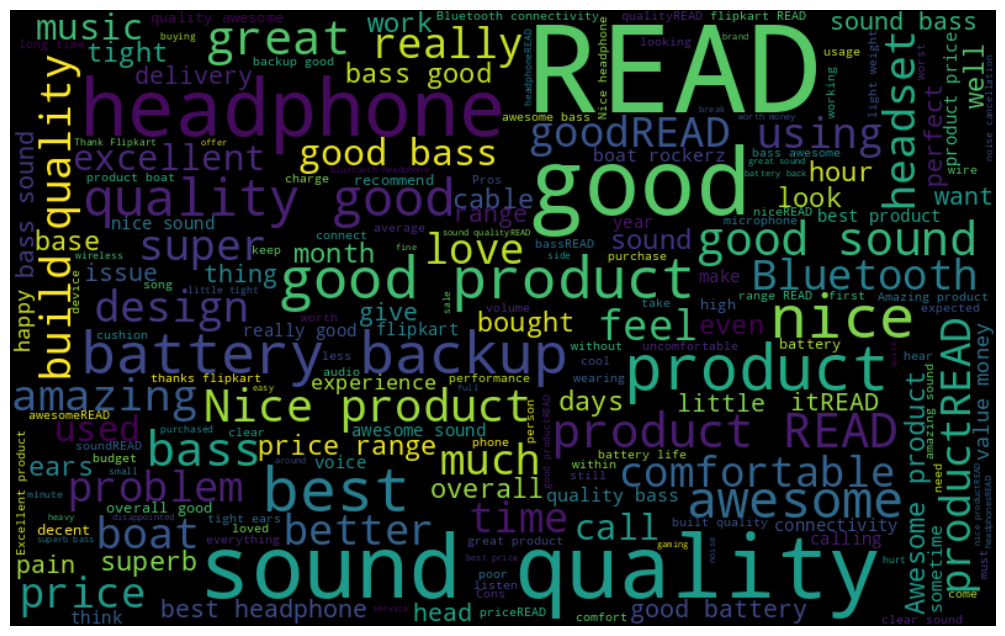

In [118]:
# visualize the frequent words

all_words = " ".join([sentence for sentence in df['review']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [119]:
# Drop rows with NaN values in the 'Text' column
positive_tweet = positive_tweet.dropna(subset=['review'])

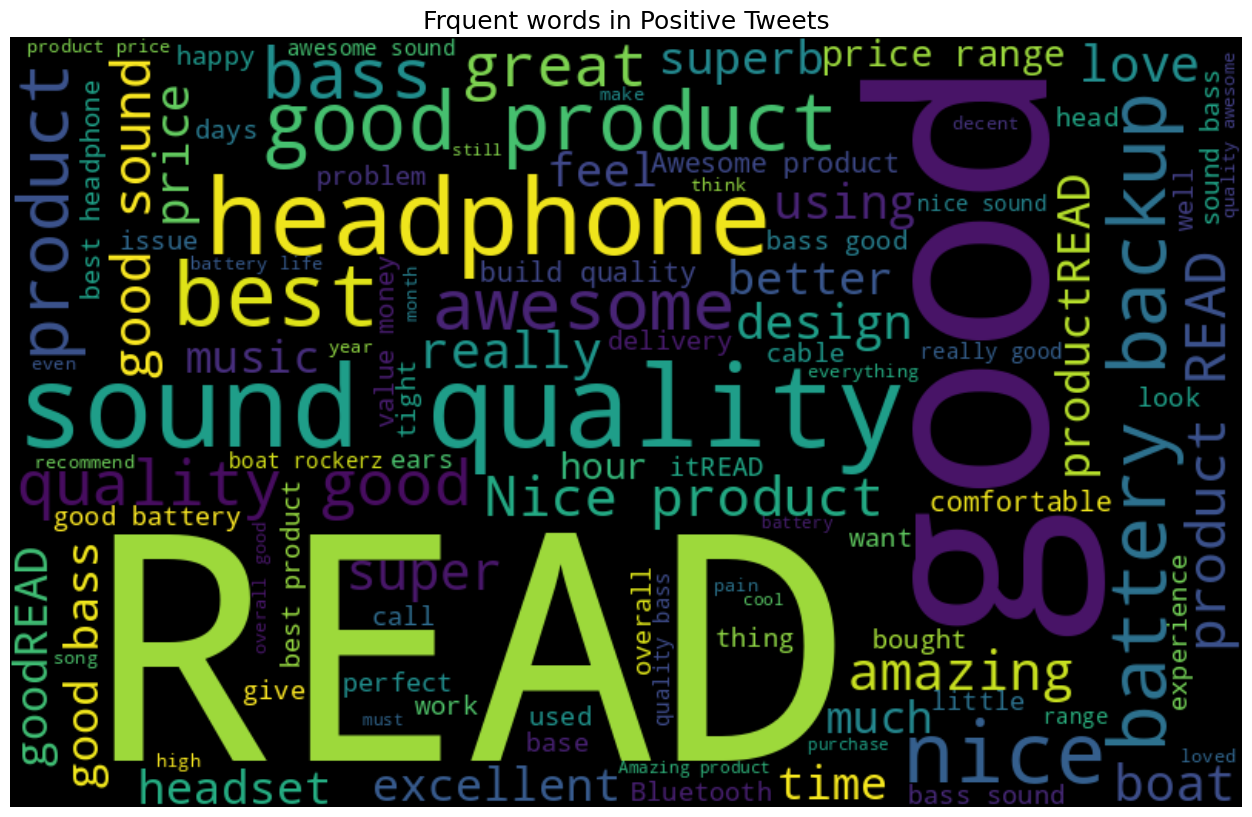

In [121]:
text = ' '.join([str(word) for word in positive_tweet['review']])
plt.figure(figsize=(20,10),facecolor='None')
wordcloud = WordCloud(max_words=100,width=800,height=500).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title("Frquent words in Positive Tweets",fontsize=18)
plt.show()


In [122]:
negative_tweet = df[df['sentiment'] == 'Negative']
negative_tweet = negative_tweet.sort_values(['polarity_score'],ascending=False)
negative_tweet.head()

,review,rating,polarity_score,sentiment
7430,best facing call issue After brake voice perso...,2,0.75,Negative
8137,Excellent productREAD MORE,2,0.75,Negative
8375,perfect within bluetooth functioning stopped R...,1,0.75,Negative
7092,happy READ MORE,2,0.65,Negative
1999,happy return policy availableREAD MORE,1,0.65,Negative


In [123]:
negative_tweet = negative_tweet.dropna(subset=['review'])

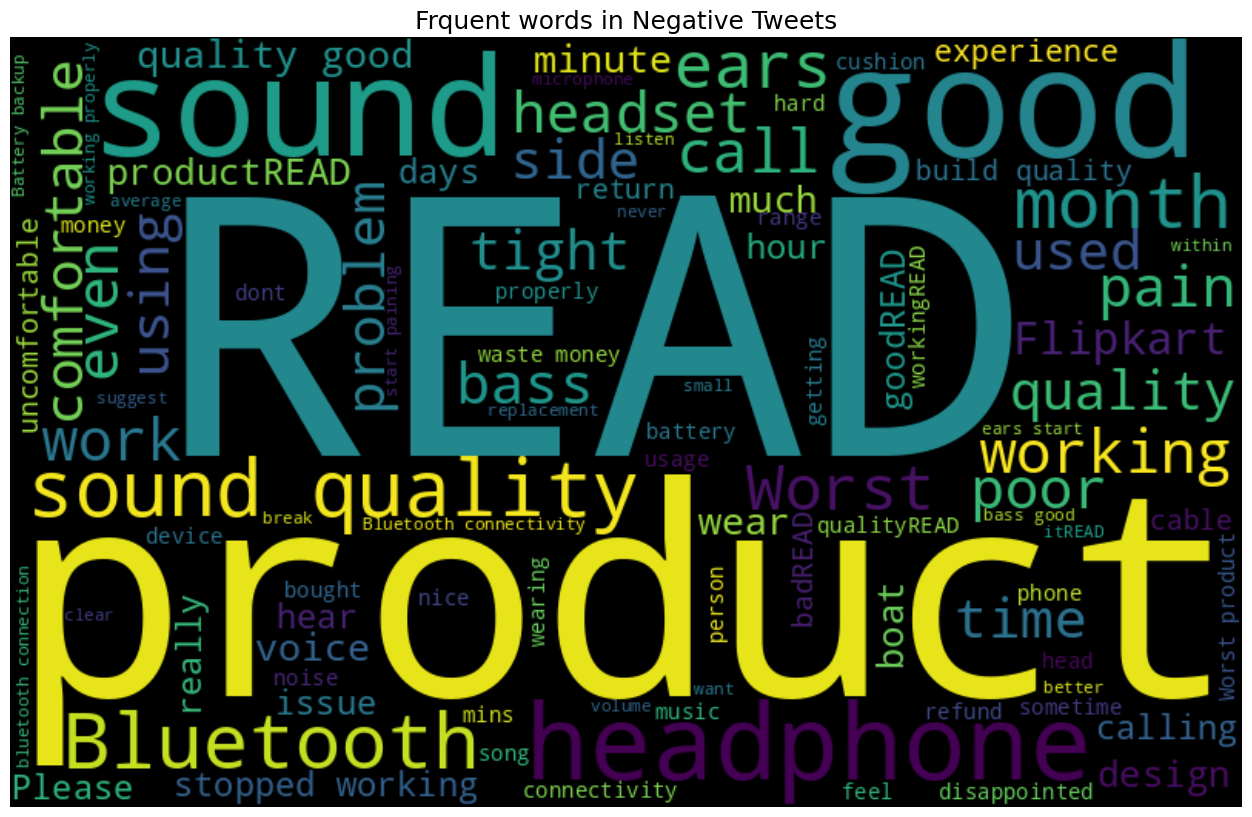

In [124]:
text = ' '.join([str(word) for word in negative_tweet['review']])
plt.figure(figsize=(20,10),facecolor='None')
wordcloud = WordCloud(max_words=100,width=800,height=500).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title("Frquent words in Negative Tweets",fontsize=18)
plt.show()

#Converting text into vectors

TF-IDF calculates that how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set). We will be implementing this with the code below.

In [126]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(df['review'] ).toarray()


In [127]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#Model Training, Evaluating and Predicting

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'],
													test_size=0.33,
													stratify=df['sentiment'],
													random_state = 42)


In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model_df = DecisionTreeClassifier(random_state=0)
model_df.fit(X_train,y_train)

#testing the model
pred = model_df.predict(X_train)
print(accuracy_score(y_train,pred))


0.9804591159172833


In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [132]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

#testing the model
lr_pred = model_lr.predict(X_train)
print(accuracy_score(y_train,lr_pred))

0.8704230696262569


In [134]:
model_rf = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)
model_rf.fit(X_train,y_train)

#testinf the model
rf_pred=model_rf.predict(X_train)
print(accuracy_score(y_train,rf_pred))

0.7877063175867957
